# **Optical Recognition of Handwritten Digits**

Project carried out by: Abode Daniel, Katerina Nieva and Pablo Zapata

**Relevant Information:**

We used preprocessing programs made available by NIST to extract
normalized bitmaps of handwritten digits from a preprinted form.
*   From a total of 43 people, 30 contributed to the training set and different 13 to the test set.
*   32x32 bitmaps (orig. data format: 1 digit = 1 (32x32) bitmap) are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block.
*   This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.

**Number of Instances:**

*   optdigits.tra (Training): 3823
*   optdigits.tes (Testing): 1797

The way we used the dataset was to use half of training for actual training, one-fourth for validation and one-fourth for writer-dependent testing. The test set was used for writer-independent testing and is the actual quality measure.

**Number of Attributes:**

*   64 input + 1 class attribute
*   All input attributes are integers in the range 0..16.
*   The last attribute is the class code 0..9

**Class Distribution:**

*No. of examples in training set*
* 0: 376
* 1: 389
* 2: 380
* 3: 389
* 4: 387
* 5: 376
* 6: 377
* 7: 387
* 8: 380
* 9: 382

*No. of examples in testing set*
* 0: 178
* 1: 182
* 2: 177
* 3: 183
* 4: 181
* 5: 182
* 6: 181
* 7: 179
* 8: 174
* 9: 180


---



**I. Initialization of Dependencies**

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**II. Importation of Raw Data**

In [70]:
train_data = np.loadtxt('optdigits.tra', delimiter=",")
test_data = np.loadtxt('optdigits.tes',delimiter=",")
init_centroid = np.loadtxt('centers_init.csv',delimiter=",") #importing an initialization matrix

init_centroid.shape

(10, 64)

**III. Split Features and Labels**

samples = 3823, features = 64

 Histogram of Labels of training Data:


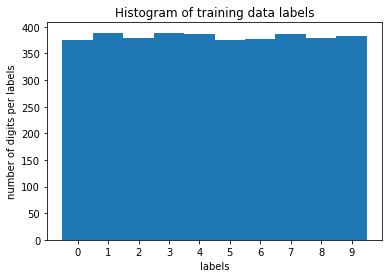

In [71]:
# Split Features and Labels for training data   
true_labels = []

for row in train_data:
  true_labels.append(int(row[64]))

true_labels = np.asarray(true_labels)

data = np.delete(train_data, 64, 1) # delete "labels" column 65

samples, features = data.shape
print("samples = %d, features = %d" % (samples, features))

# Visualizing the training features with histogram
print("\n", "Histogram of Labels of training Data:")
bins = np.arange(11) - 0.5
plt.hist(true_labels, bins)
plt.xticks(range(10))
plt.xlim([-1, 10])
plt.xlabel('labels')
plt.ylabel('number of digits per labels')
plt.title('Histogram of training data labels')

plt.savefig('Histogram of training data labels.png')
plt.show()

Spliting the test data

samples = 1797, features = 64

 Histogram of Labels of test Data:


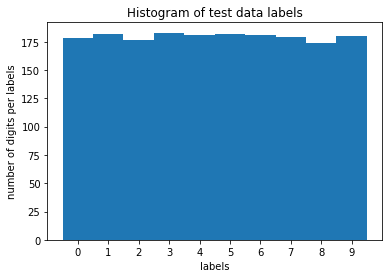

In [72]:
# Split Features and Labels for training data 
test_data_features = []
test_labels = []

for row in test_data:
  test_labels.append(int(row[64]))

test_labels = np.asarray(test_labels)

test_data_features = np.delete(test_data, 64, 1) # delete "labels" column 65

samples, features = test_data_features.shape
print("samples = %d, features = %d" % (samples, features))

#Histogram of test data labels
print("\n", "Histogram of Labels of test Data:")
bins = np.arange(11) - 0.5
plt.hist(test_labels, bins)
plt.xticks(range(10))
plt.xlim([-1, 10])
plt.xlabel('labels')
plt.ylabel('number of digits per labels')
plt.title('Histogram of test data labels')

plt.savefig('Histogram of test data labels.png')
plt.show()

**IV. K-Means Clustering**

In [74]:
# K-Means Clustering

#kmeans = KMeans(n_clusters=10, init='k-means++', verbose = 1)  #Kmeans with init = k-means++
kmeans = KMeans(n_clusters=10, init=init_centroid)              #Kmeans with init = init_centroid
clusters = kmeans.fit_predict(data)
print('Clusters:', kmeans.cluster_centers_.shape) # 10 clusters in 64 dimensions

Clusters: (10, 64)


C:\Users\Abode\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return self.fit(X, sample_weight=sample_weight).labels_


**V. Data Visualization: Cluster Centers**

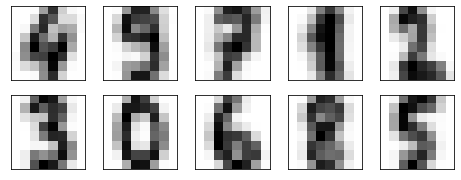

In [75]:
# Plot Cluster Centers

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

**VI. Algorithm Evaluation**

True Labels: [0 0 7 ... 6 6 7] 

Mask:
[False False False ... False False False]
[False False False ... False False False]
[False False  True ... False False  True]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[ True  True False ... False False False]
[False False False ...  True  True False]
[False False False ... False False False]
[False False False ... False False False]

 Accuracy: 87.8368 %

 Histogram of Clusters:


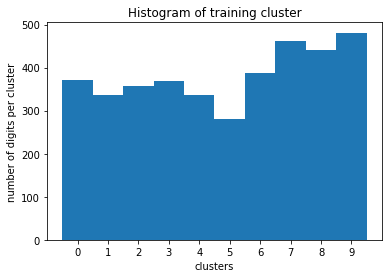


 Confusion Matrix:


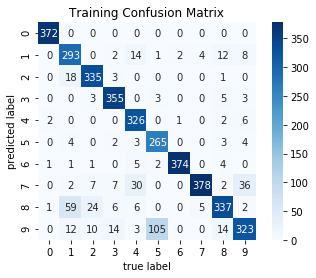

In [76]:
# Print true digit labels (of int type)
print("True Labels:", true_labels, "\n")

pred_labels = np.zeros_like(clusters) # Returns an array of zeros with the same shape and type as that of the parameter/argument.

# Match each learned cluster label with the true labels found in them
print("Mask:")
for i in range(10):
  mask = (clusters == i)
  print(mask)
  pred_labels[mask] = mode(true_labels[mask])[0]

# Check accuracy
print("\n", "Accuracy:", round(accuracy_score(true_labels, pred_labels)*100, 4), '%')

# Plot the histogram per cluster

print("\n", "Histogram of Clusters:")
bins = np.arange(11) - 0.5
plt.hist(pred_labels, bins)
plt.xticks(range(10))
plt.xlim([-1, 10])
plt.xlabel('clusters')
plt.ylabel('number of digits per cluster')
plt.title('Histogram of training cluster')
plt.savefig('training cluster.png')
plt.show()

# Plot confusion matrix
print("\n", "Confusion Matrix:")
mat = confusion_matrix(true_labels, pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Training Confusion Matrix')
plt.savefig('Confusion.png')
plt.show()

**VII. Elbow Method: Variable Cluster**

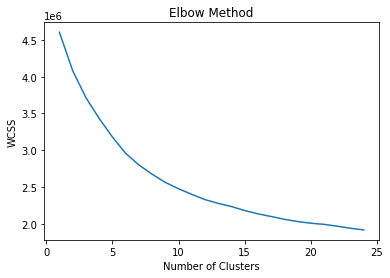

Stop Criterion (epsilon=0.001)
i=10: 0.0335
i=15: 0.0242
i=20: 0.0112


In [ ]:
wcss = [] # Within Cluster Sum-of-Squares
# Source: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

for i in range(1,25):
    kmeans_ = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_.fit(data)
    wcss.append(kmeans_.inertia_)
plt.plot(range(1,25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

print('Stop Criterion (epsilon=0.001)')

print('i=10:', round(((wcss[9]-wcss[8])/wcss[8])*-1, 4))
print('i=15:', round(((wcss[14]-wcss[13])/wcss[13])*-1, 4))
print('i=20:', round(((wcss[19]-wcss[18])/wcss[18])*-1, 4))

**VIII. Elbow Method: Variable Iteration**

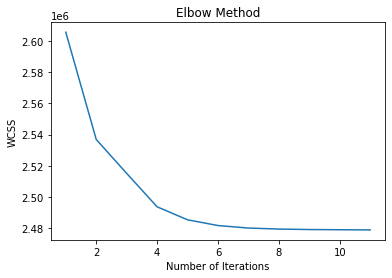

Stop Criterion (epsilon=0.001)
iter=2: 0.0263
iter=4: 0.0085
iter=6: 0.0015
iter=8: 0.0003
iter=10: 0.0001


In [ ]:
wcss = [] # Within Cluster Sum-of-Squares

for i in range(1,12):
    kmeans_ = KMeans(n_clusters=10, init='k-means++', max_iter=i, n_init=10, random_state=0)
    kmeans_.fit(data)
    wcss.append(kmeans_.inertia_)
plt.plot(range(1,12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Iterations')
plt.ylabel('WCSS')
plt.show()

print('Stop Criterion (epsilon=0.001)')

print('iter=2:', round(((wcss[1]-wcss[0])/wcss[0])*-1, 4))
print('iter=4:', round(((wcss[3]-wcss[2])/wcss[2])*-1, 4))
print('iter=6:', round(((wcss[5]-wcss[4])/wcss[4])*-1, 4))
print('iter=8:', round(((wcss[7]-wcss[6])/wcss[6])*-1, 4))
print('iter=10:', round(((wcss[9]-wcss[8])/wcss[8])*-1, 4))

Computing the Sihouette 

No. of Clusters		Ave. Silhouette Score
      2 			 0.1221
      3 			 0.1205
      4 			 0.1355
      5 			 0.1483
      6 			 0.1604
      7 			 0.1708
      8 			 0.1807
      9 			 0.1889
      10 			 0.1915
      11 			 0.1882
      12 			 0.1891
      13 			 0.1898
      14 			 0.1859
      15 			 0.1874
      16 			 0.1826
      17 			 0.1745
      18 			 0.17
      19 			 0.15
      20 			 0.1672
      21 			 0.1626
      22 			 0.1619
      23 			 0.1579
      24 			 0.159
      25 			 0.1579


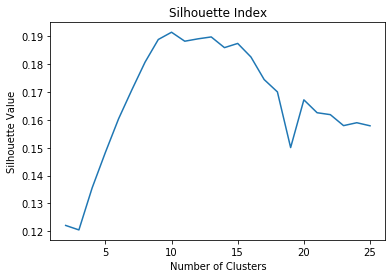

In [77]:
# Working on the Silhouette

# source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

sil_score = []

print("No. of Clusters\t\tAve. Silhouette Score")

for n_clusters in range (2,26):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    sil_score.append(silhouette_avg)
    print("     ", n_clusters, "\t\t\t", round(silhouette_avg,4))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    # The index must be maximized (tend to 1) for a better clustering.

# Plot the Silhouette Index
# '10' is at the peak, which is the 'ideal' number of clusters

plt.plot(range(2,26),sil_score)
plt.title('Silhouette Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.savefig('Silhouette.png')
plt.show()


Working on the test


[6 3 3 ... 8 1 8]
Mask:
[False False False ... False False False]
[False False False ... False  True False]
[False False False ... False False False]
[False  True  True ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[ True False False ... False False False]
[False False False ... False False False]
[False False False ...  True False  True]
[False False False ... False False False]

 Accuracy: 85.5871 %

 Histogram of Clusters:


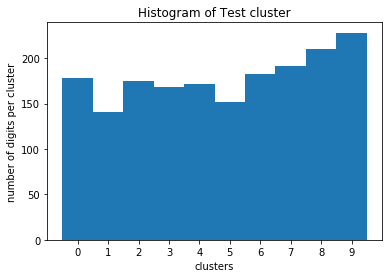


 Confusion Matrix:


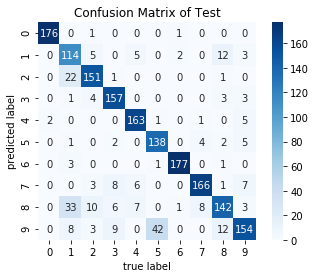

In [78]:
#Testing model on test data

labels = kmeans.predict(test_data_features)
print(labels)
pred_test_labels = np.zeros_like(labels) # Returns an array of zeros with the same shape and type as that of the parameter/argument.

# Match each learned cluster label with the true labels found in them
print("Mask:")
for i in range(10):
  mask = (labels == i)
  print(mask)
  pred_test_labels[mask] = mode(test_labels[mask])[0]


#Computing the accuracy
print("\n", "Accuracy:", round(accuracy_score(test_labels, pred_test_labels)*100, 4), '%')


#Computing the Histogram
print("\n", "Histogram of Clusters:")
bins = np.arange(11) - 0.5
plt.hist(pred_test_labels, bins)
plt.xticks(range(10))
plt.xlim([-1, 10])
plt.xlabel('clusters')
plt.ylabel('number of digits per cluster')
plt.title('Histogram of Test cluster')
plt.savefig('Test cluster.png')
plt.show()

#Computing the confusion matrix for test

print("\n", "Confusion Matrix:")
mat = confusion_matrix(test_labels, pred_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of Test')
plt.savefig('Confusion.png')
plt.show()

##Comparison with Hierarchical Clustering

In [79]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [80]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

[0.16371335975912166, 0.17119089451073316, 0.1745470931891432, 0.17304962576959765, 0.17388412758382546, 0.16203702753451404, 0.13809806137402877]


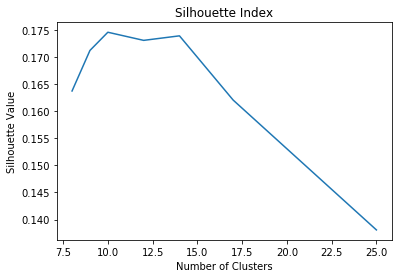

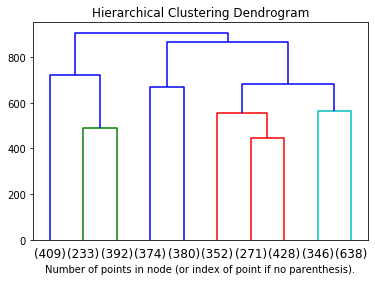

# Clusters:  25
Silhouette   0.13809806137402877


In [81]:
# Creating the hierarchical cluster with Agglomerative Clustering 

clusters_ = []
silhouette_avg = []
distance = [500, 450, 400, 350, 300, 250, 200] 
for j in distance: #for difference value of distance_threshold corresponding to different number of clusters
    model = AgglomerativeClustering(distance_threshold=j, n_clusters=None)
    model = model.fit(data)
    cluster_labels = model.fit_predict(data)
    clusters_.append(model.n_clusters_)
    silhouette_avg.append(silhouette_score(data, cluster_labels))

    
#model = AgglomerativeClustering(distance_threshold=400, n_clusters=None) #model without iteration, just for K = 10    
print(silhouette_avg)

#plotting number of clusters vs silhouette_score
plt.plot(clusters_,silhouette_avg)
plt.title('Silhouette Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.savefig('Silhouette.png')
plt.show()

    
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
# plot_dendrogram(model, truncate_mode='level', p=3)
plot_dendrogram(model, truncate_mode='lastp', p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig('Dendogram.png')
plt.show()

################################################################################
print('# Clusters: ',model.n_clusters_)


# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(data, cluster_labels)

print("Silhouette  ", silhouette_avg)

True Labels: [0 0 7 ... 6 6 7] 

Mask:
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[ True  True False ... False False False]
[False False False ...  True  True False]
[False False  True ... False False  True]
[False False False ... False False False]
[False False False ... False False False]

 Accuracy: 81.6375 %

 Histogram of Clusters:


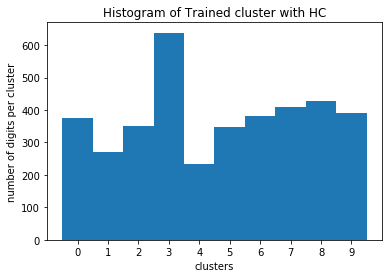


 Confusion Matrix:


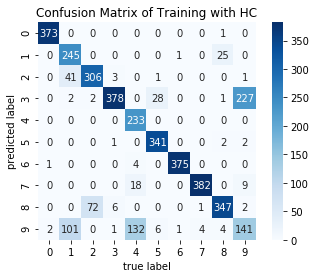

In [41]:

# Print true digit labels (of int type)
print("True Labels:", true_labels, "\n")

pred_labels = np.zeros_like(cluster_labels) # Returns an array of zeros with the same shape and type as that of the parameter/argument.

# Match each learned cluster label with the true labels found in them
print("Mask:")
for i in range(10):
  mask = (cluster_labels == i)
  print(mask)
  pred_labels[mask] = mode(true_labels[mask])[0]

# Check accuracy
print("\n", "Accuracy:", round(accuracy_score(true_labels, pred_labels)*100, 4), '%')

# Plot the histogram per cluster

print("\n", "Histogram of Clusters:")
bins = np.arange(11) - 0.5
plt.hist(pred_labels, bins)
plt.xticks(range(10))
plt.xlim([-1, 10])
plt.xlabel('clusters')
plt.ylabel('number of digits per cluster')
plt.title('Histogram of Trained cluster with HC')
plt.savefig('Trained cluster with HC.png')
plt.show()

#Working on confusion matrix
print("\n", "Confusion Matrix:")
mat = confusion_matrix(true_labels, pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of Training with HC')
plt.savefig('Confusion.png')
plt.show()

Testing the Hierachical Clustering 

9
Mask:
[False False  True ...  True False  True]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[ True False False ... False False False]
[False False False ... False False False]
[False  True False ... False False False]

 Accuracy: 63.5504 %

 Confusion Matrix:


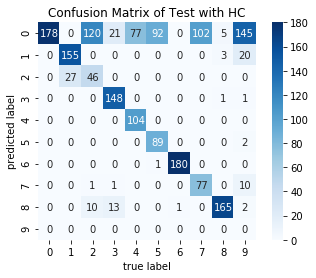

In [83]:
#Testing the Hierachical model on test data

labels = model.fit_predict(test_data_features)
print(labels[1])
pred_test_labels = np.zeros_like(labels) # Returns an array of zeros with the same shape and type as that of the parameter/argument.

# Match each learned cluster label with the true labels found in them
print("Mask:")
for i in range(10):
  mask = (labels == i)
  print(mask)
  pred_test_labels[mask] = mode(test_labels[mask])[0]


#computing the accuracy
print("\n", "Accuracy:", round(accuracy_score(test_labels, pred_test_labels)*100, 4), '%')

#Computing the confusion matrix for test

print("\n", "Confusion Matrix:")
mat = confusion_matrix(test_labels, pred_test_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix of Test with HC')
plt.savefig('Confusion.png')
plt.show()
